# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [2]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

Import project files

In [4]:
#import sys
#sys.path.append("utils")
# from utils import models

In [5]:
from utils import nlp_utils, cluster_utils, utilization_utils, anonym_utils

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Uploading data

In [6]:
train_file = 'data/df_filtered_1000.csv'

Getting dataframe

In [7]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 15.6 ms
Wall time: 19.6 ms


## 1+2) Lemmatizing and protecting stopwords

Defining the word dictionary

In [8]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])
word_list = cluster_utils.get_word_list_for_clustering(word_dict)

CPU times: total: 21.9 s
Wall time: 24.9 s


## 3) Word replacement

### 3.1) Clustering using DBSCAN

#### 3.1.1) Using DBSCAN with the default euclidean distance

Embedding the word list

In [9]:
embedded_dict = cluster_utils.embed_corpus(word_list)

Clustering

eps 1.7651676497117053
CPU times: total: 1.69 s
Wall time: 867 ms


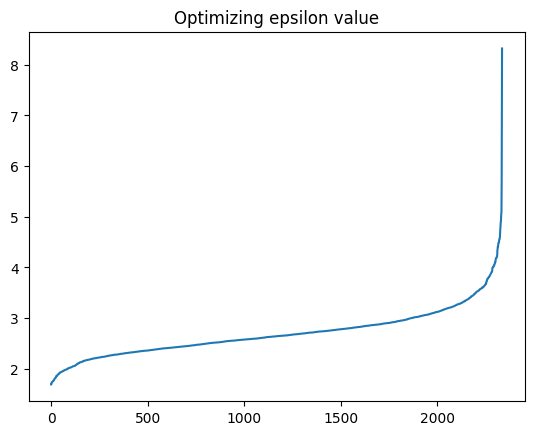

In [10]:
%%time

cluster_dict, dist_dict, labels = cluster_utils.run_clustering(embedded_dict)

In [11]:
#for key, val in dist_dict_2.items():
#    print('dist 1:', dist_dict[key], '\tdist 2:', dist_dict_2[key])

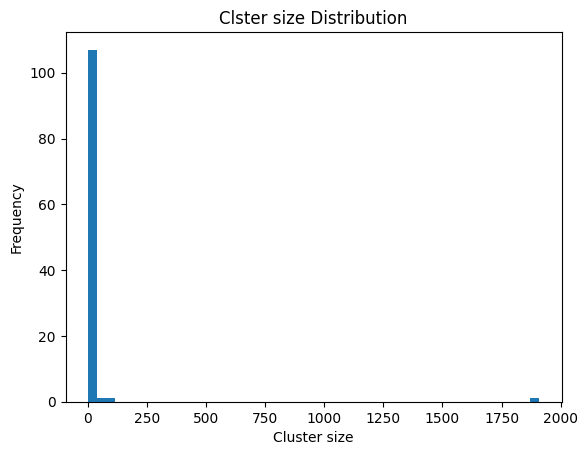

In [12]:
cluster_utils.plot_cluster_size_distribution(cluster_dict)

Plotting tSNE

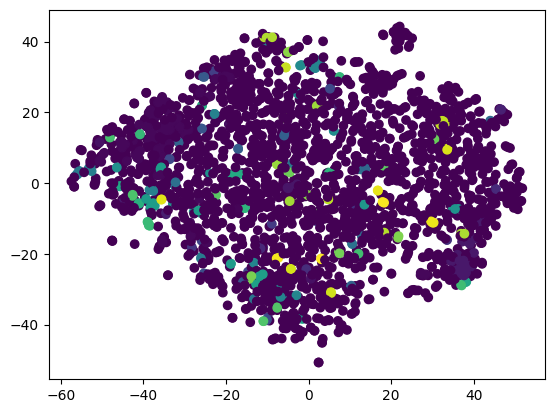

CPU times: total: 1min 13s
Wall time: 21.7 s


In [13]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels)

#### 3.1.2) Using DBSCAN with cosine distance

Testing DBSCAN with cosine metric

eps 0.053744078


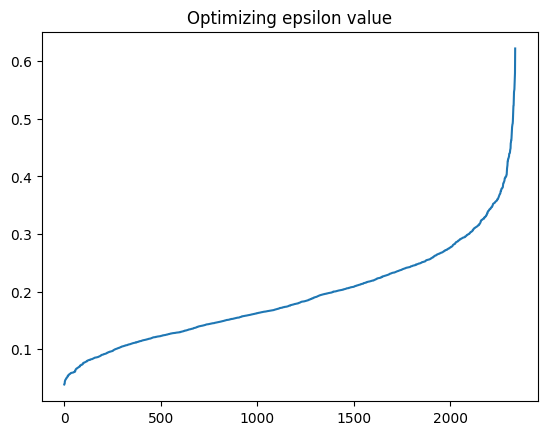

In [14]:
cluster_dict_cos, dist_dict_cos, labels_cos = cluster_utils.run_clustering(embedded_dict, cosine=True)

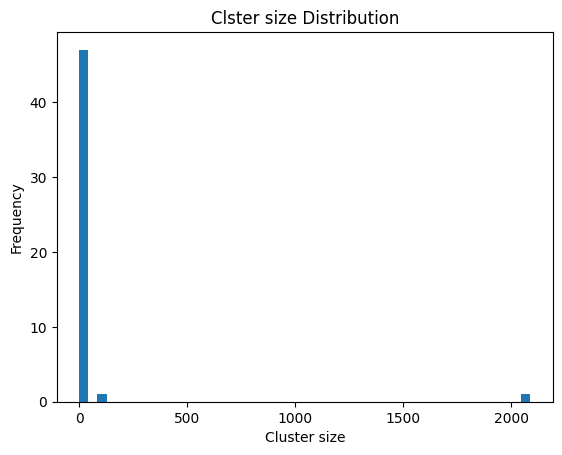

In [15]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_cos)

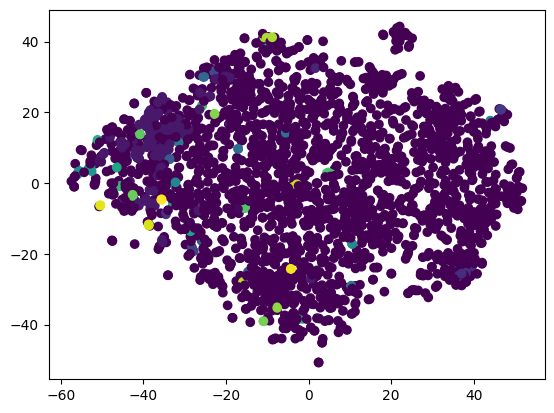

CPU times: total: 1min 13s
Wall time: 22.8 s


In [16]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels_cos)

#### 3.1.3) Using HDBSCAN with UMAP

In [17]:
cluster_dict_h, dist_dict_h, labels_h = cluster_utils.run_clustering_hdbscan(embedded_dict)

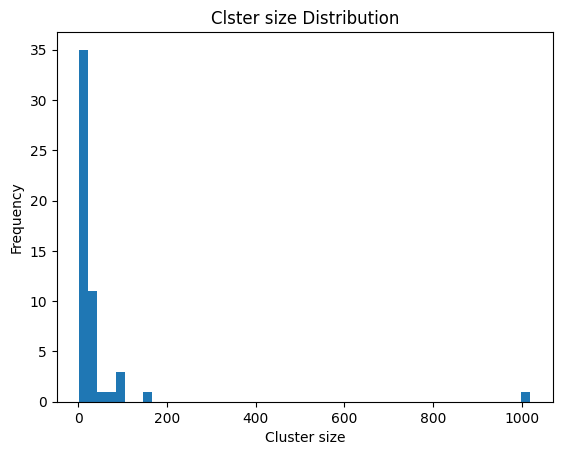

In [18]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_h)

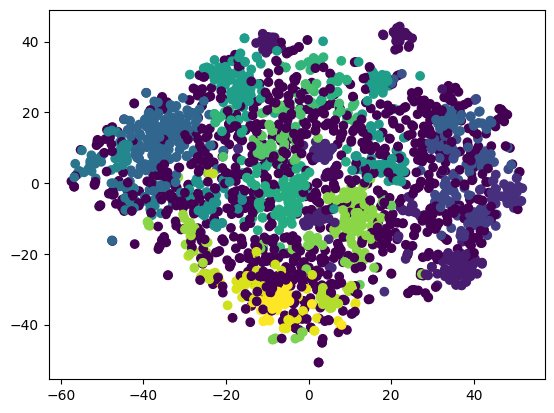

In [19]:
cluster_utils.plot_tsne(embedded_dict, labels_h)

#### 3.1.4) Comapirson

In [20]:
print('Euclidian distance:\t', len(cluster_dict), 'clusters')
print('Cosine distance:\t', len(cluster_dict_cos), 'clusters')
print('HDBSCAN clustering:\t', len(cluster_dict_h), 'clusters')

Euclidian distance:	 110 clusters
Cosine distance:	 49 clusters
HDBSCAN clustering:	 53 clusters


Plotting Jaccard index histogram

In [21]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = cluster_utils.get_word_list_for_clustering(test_dict)
test_list

['hi', 'banana', 'chocolate', 'cola', 'love']

Getting distance threshold

In [22]:
threshold = cluster_utils.define_max_threshold()
threshold

sim_list_best 0.82521856
sim_list_worst 0.56748897


0.3036462366580963

### 3.2) Replacing words in documents

#### 3.2.1) Based on Eucledian distance

In [23]:
######################### TEMP #######################
#df = df[:30]

Starting average Jaccard index: 0.18490998931057948
Distance threshold: 0.3036462366580963
distance: 0.12027458 	replacing ['free', 'check'] in new
distance: 0.3280925 the next cluster is too wide and wont be replaced: ['guy', 'unless', 'catch', 'certainly', 'anyone', 'yes', 'old', 'absolutely', 'actually', 'either', 'bring', 'hold', 'give', 'always', 'mind', 'although', 'wonder', 'yeah', 'three', 'mean', 'talk', 'think', 'crazy', 'take', 'see', 'life', 'shame', 'princess', 'run', 'reason', 'especially', 'hope', 'four', 'lady', 'except', 'surprised', 'damn', 'normally', 'need', 'well', 'understand', 'mess', 'forget', 'exactly', 'basically', 'like', 'necessary', 'anyway', 'tell', 'leave', 'obviously', 'sure', 'queen', 'hear', 'though', 'step', 'would', 'definitely', 'unfortunately', 'perhaps', 'much', 'might', 'still', 'matter', 'probably', 'totally', 'fly', 'however', 'remember', 'get', 'two', 'could', 'maybe', 'whether', 'nothing', 'jump', 'kid', 'turn', 'make', 'wow', 'way', 'dude', 

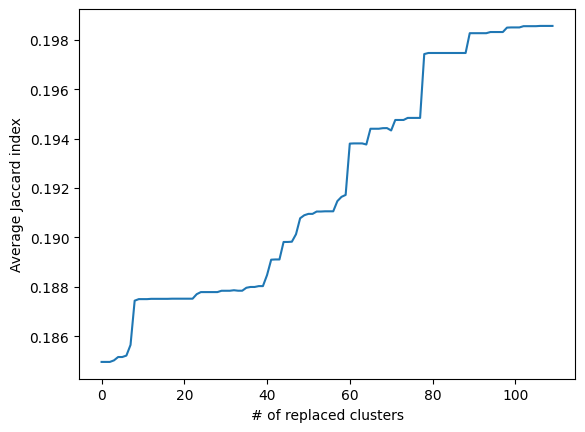

In [24]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, dist_dict, threshold, word_dict)

In [25]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
1,461,just awful: this was possibly the worst book i...,0,25,just worse : this was possibly the bad book i ...,(just) [worse] (this) (was) possibly (the) {ba...
2,493,no lessons learned: this is one of the most di...,0,23,no lesson speak : this is one of the most pred...,(no) {lesson} {learn} (this) (is) one (of) (th...
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size run really small , it bag up e...","pass: (the) {size} run really small, (it) {fli..."
...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct secret ....,excellent: prompt delivery. correct {part} (yo...
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : like the movie so i free it ....,video purchase: like (the) movie (so) (i) {buy...


#### 3.2.2) Based on Cosine distance

Starting average Jaccard index: 0.18490998931057948
Distance threshold: 0.3036462366580963
distance: 0.12027458 	replacing ['free', 'check'] in new
distance: 0.17466207 	replacing ['guy', 'old', 'girl', 'kid'] in like
distance: 0.32705247 the next cluster is too wide and wont be replaced: ['today', 'unless', 'certainly', 'summer', 'anyone', 'absolutely', 'actually', 'either', 'bring', 'give', 'always', 'good', 'mind', 'although', 'wonder', 'three', 'mean', 'talk', 'think', 'crazy', 'take', 'see', 'life', 'since', 'trust', 'already', 'reason', 'especially', 'finally', 'another', 'hope', 'four', 'ever', 'except', 'surprised', 'damn', 'need', 'well', 'first', 'understand', 'night', 'explain', 'forget', 'exactly', 'basically', 'like', 'dumb', 'almost', 'people', 'anyway', 'tell', 'anymore', 'thing', 'leave', 'second', 'obviously', 'sure', 'hear', 'though', 'would', 'day', 'definitely', 'unfortunately', 'perhaps', 'much', 'might', 'still', 'matter', 'probably', 'able', 'totally', 'last', 'h

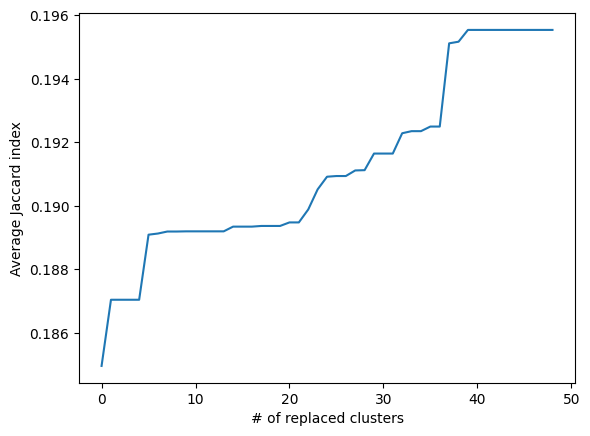

In [34]:
%%time
df_3, word_dict_3 = nlp_utils.replace_words_in_df(df, cluster_dict_cos, dist_dict_cos, threshold, word_dict)

In [27]:
df_3

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
1,461,just awful: this was possibly the worst book i...,0,25,just crap : this was possibly the bad book i h...,(just) [crap] (this) (was) possibly (the) {bad...
2,493,no lessons learned: this is one of the most di...,0,23,no lesson speak : this is one of the most disa...,(no) {lesson} {learn} (this) (is) one (of) (th...
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size down really small , it flip up...","pass: (the) {size} [down] really small, (it) {..."
...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct part . y...,excellent: prompt delivery. correct {part} (yo...
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : like the movie so i free it ....,video purchase: like (the) movie (so) (i) {buy...


#### 3.2.3) Based on HDBSCAN clustering

Starting average Jaccard index: 0.18490998931057948
Distance threshold: 0.3036462366580963
distance: 0.36871594 the next cluster is too wide and wont be replaced: ['free', 'phone', 'promote', 'mention', 'share', 'check', 'replace']
distance: 0.31897232 the next cluster is too wide and wont be replaced: ['guy', 'old', 'little', 'mother', 'sister', 'picture', 'daughter', 'mom', 'father', 'girl', 'ask', 'husband', 'name', 'brother', 'baby', 'marry', 'wife', 'kid', 'friend', 'adorable', 'dad', 'boyfriend', 'look', 'woman', 'nephew', 'cute']
distance: 0.39560968 the next cluster is too wide and wont be replaced: ['pattern', 'copper', 'remover', 'diaper', 'spray', 'lamp', 'necklace', 'charm', 'wood', 'dryer', 'washer', 'cardboard', 'freezer', 'seed', 'fabric', 'vibrator', 'bead', 'frame']
distance: 0.37035984 the next cluster is too wide and wont be replaced: ['imaginative', 'reliable', 'helpful', 'definite', 'manner', 'neat', 'fascinating', 'unacceptable', 'convenient', 'realistic', 'intrig

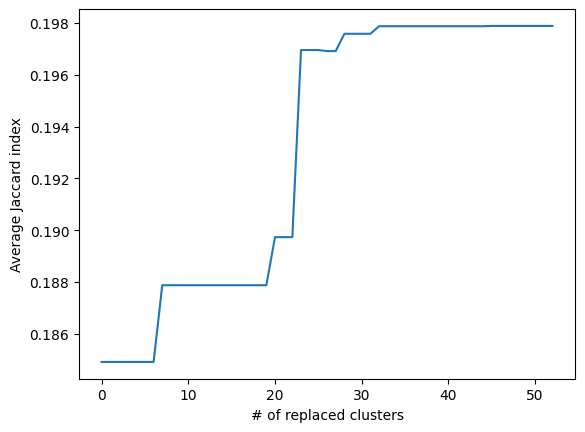

In [28]:
%%time
df_4, word_dict_4 = nlp_utils.replace_words_in_df(df, cluster_dict_h, dist_dict_h, threshold, word_dict)

In [29]:
df_4

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
1,461,just awful: this was possibly the worst book i...,0,25,just awful : this was possibly the bad book i ...,(just) [crap] (this) (was) possibly (the) {bad...
2,493,no lessons learned: this is one of the most di...,0,23,no lesson learn : this is one of the most disa...,(no) {lesson} {learn} (this) (is) one (of) (th...
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size down really small , it flip up...","pass: (the) {size} [down] really small, (it) {..."
...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct part . y...,excellent: prompt delivery. correct {part} (yo...
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : like the movie so i buy it . ...,video purchase: like (the) movie (so) (i) {buy...


Looking at the histogram again

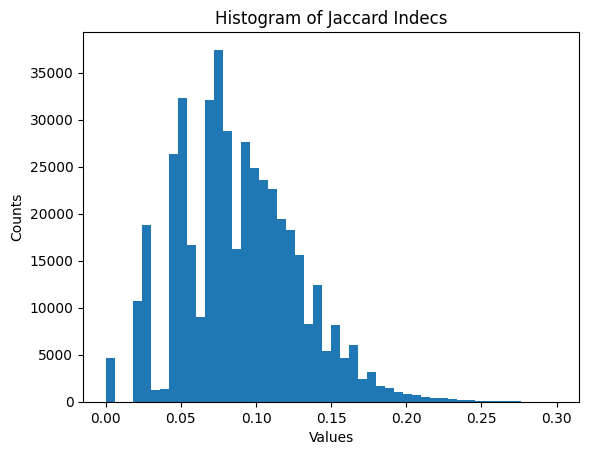

CPU times: total: 9.25 s
Wall time: 10.9 s


In [30]:
%%time
nlp_utils.plot_jaccard_hist(df_2, column='txt')

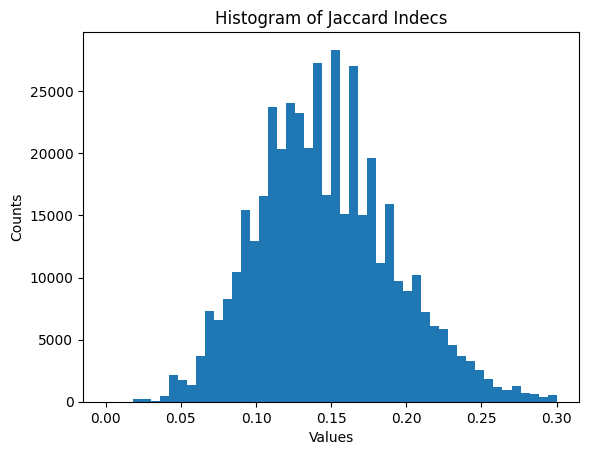

CPU times: total: 10.2 s
Wall time: 11.8 s


In [31]:
%%time
nlp_utils.plot_jaccard_hist(df_2, 'anon_txt')

For eucledian distance

In [36]:
protected, lemma, replaced, all_words = nlp_utils.get_stat(word_dict_2)
print(f'Protected: {protected}\tLemmatized: {lemma}\t Replaced: {replaced}\t All: {all_words}')

Protected: 135	Lemmatized: 970	 Replaced: 338	 All: 3311


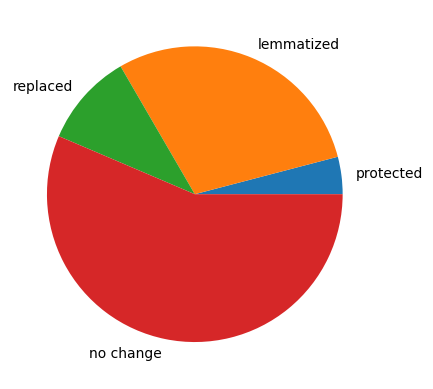

In [39]:
y = np.array([protected, lemma, replaced, (all_words - protected - lemma - replaced)])
mylabels = ['protected', 'lemmatized', 'replaced', 'no change']

plt.pie(y, labels = mylabels)
plt.show()

## 4) Force anonymity

### Get anonymity degree

Before replacement

In [40]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 944 	number of all documents: 946


After replacement

In [41]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['anon_txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['anon_txt']))

Current k: 1 	number of un-anonym. documents: 944 	number of all documents: 946


### Steps:
1. Finding k nearest neighbors using approximate nearest neighbors
2. Finding the different words between the neighbors
2. Replacing the different words with *

In [42]:
anonym_utils.delete_uncommon_words(['I love choco', 'I love banana'])


['I love *', 'I love *']

In [43]:
anonym_utils.force_anonym_using_annoy(['I love choco', 'I love banana', 'lalala'], k=2)

Start: get_anonym_degree: 1
similar_doc_ind [0, 1]
Breaking after moving over 2 of all 3 indexes.
unused_indexes: [2]
End: get_anonym_degree: 1


['I love *', 'I love *', '*']

In [76]:
force_anon_txt_annoy = anonym_utils.force_anonym_using_annoy(df_2['anon_txt'], k=2)
anonym_utils.get_anonym_degree(force_anon_txt_annoy)

Start: get_anonym_degree: 1
similar_doc_ind [0, 298]
['album' 'beware' 'caution' 'hit' 'irrelevant' 'original' 'oringal'
 'record' 'remastere' 'song' 'track' 'version' 'whether']
similar_doc_ind [1, 265]
['amazed' 'annoying' 'bad' 'book' 'comlicate' 'ever' 'fan' 'get' 'kind'
 'number' 'piece' 'possibly' 'read' 'rubbish' 'worse']
similar_doc_ind [2, 754]
['algebra' 'amazon' 'apology' 'book' 'classes' 'extra' 'go' 'good'
 'lesson' 'libertarian' 'long' 'make' 'one' 'practice' 'predictable'
 'purchase' 'speak' 'the' 'use' 'vapid']
similar_doc_ind [3, 246]
['accord' 'chart' 'large' 'measurement' 'much' 'order' 'regular' 'return'
 'see' 'size' 'small' 'squeem' 'uncomfortable' 'way' 'wrong']
similar_doc_ind [4, 534]
['bag' 'bean' 'comfortable' 'dissapointed' 'even' 'fit' 'good' 'hold'
 'hook' 'pass' 'price' 'purchase' 'really' 'run' 'say' 'size' 'small'
 'though' 'use' 'would']
similar_doc_ind [5, 876]
['exciting' 'expect' 'fit' 'good' 'include' 'liking' 'may' 'misleading'
 'relaxed' 'return'

(1, [[705], [693], [916], [134], [698], [133], [702]])

In [77]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(force_anon_txt_annoy)
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 7 	number of all documents: 946


In [80]:
anonym_utils.delete_uncommon_words([force_anon_txt_annoy[693],force_anon_txt_annoy[705]])

['pamper' 'take']


['pamper : what a * * . i * these for my * and they * me take and * . i * * again',
 '* * ! ! : * * ! ! they * in * take than * to my * ! you just can not * * with pamper and i am * * ! ! :)']

In [81]:
print([693, 705])
print(df_2['anon_txt'][693])
print(force_anon_txt_annoy[693])
print()
print(df_2['anon_txt'][705])
print(force_anon_txt_annoy[705])

[693, 705]
pamper : what a life saver . i order these for my grandfather and they save me take and money . i would purchase again
pamper : what a * * . i * these for my * and they * me take and * . i * * again

great trade ! ! : great trade ! ! they arrive in less take than quote to my door ! you just can not go wrong with pamper and i am love amazon ! ! :)
* * ! ! : * * ! ! they * in * take than * to my * ! you just can not * * with pamper and i am * * ! ! :)


In [82]:
arr, voc = anonym_utils.get_bow([force_anon_txt_annoy[693], force_anon_txt_annoy[705]])
print(voc)
print(arr.toarray())

['pamper' 'take']
[[1 1]
 [1 1]]


In [83]:
df_2['force_anon_txt'] = force_anon_txt_annoy
# Counting the number of words and *
df_2['num_of_words_after_forcing'] = df_2['force_anon_txt'].apply(lambda x: len(re.findall(r'\w+', x)))
df_2['num_of_deleting_after_forcing'] = df_2['force_anon_txt'].apply(lambda x: len(re.findall(r'\*', x)))

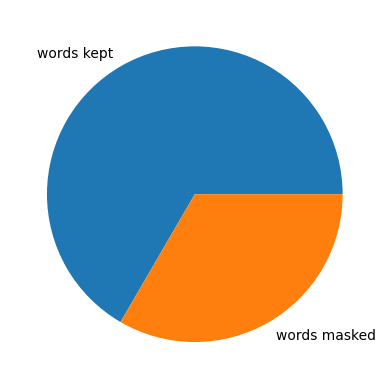

In [84]:
y = np.array([df_2['num_of_words_after_forcing'].sum(), df_2['num_of_deleting_after_forcing'].sum()])
mylabels = ['words kept', 'words masked']

plt.pie(y, labels = mylabels)
plt.show()

In [85]:
i = 1
print(df_2['txt'][i])
print(df_2['anon_txt_history'][i])
print(df_2['force_anon_txt'][i])

just awful: this was possibly the worst book i have ever read. i am amazed by the number of fans for this kind of rubbish.
(just) [worse] (this) (was) possibly (the) {bad} book (i) (have) ever read. (i) (am) {amaze} (by) (the) number (of) {fan} (for) (this) kind (of) rubbish. 
just * : this was * the bad book i have ever read . i am * by the * of * for this * of * .


## 5) Utilization tests

In [86]:
df_21 = utilization_utils.get_vader_sentiment_for_df(df_2, ['txt', 'anon_txt', 'force_anon_txt'])
df_21

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,force_anon_txt,num_of_words_after_forcing,num_of_deleting_after_forcing,txt_vader_sentiment_pred,anon_txt_vader_sentiment_pred,force_anon_txt_vader_sentiment_pred
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...","* ! : these * are not the "" original "" version...",17,6,0.0000,-0.1957,-0.1957
1,461,just awful: this was possibly the worst book i...,0,25,just worse : this was possibly the bad book i ...,(just) [worse] (this) (was) possibly (the) {ba...,just * : this was * the bad book i have ever r...,18,7,-0.5574,-0.2023,-0.5423
2,493,no lessons learned: this is one of the most di...,0,23,no lesson speak : this is one of the most pred...,(no) {lesson} {learn} (this) (is) one (of) (th...,no lesson * : this is one of * most * * i have...,13,11,-0.5563,-0.0258,-0.2960
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,* : i order * to the size * for my * and it wa...,16,6,0.0000,0.0000,0.0000
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size run really small , it bag up e...","pass: (the) {size} run really small, (it) {fli...","* : the size * * * , it bag up * * , they * it...",16,10,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct secret ....,excellent: prompt delivery. correct {part} (yo...,excellent : * * . * * . you can not do * with ...,15,10,0.8622,0.9020,0.8748
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....,* * * * 3 * from amazon.com . : the * was * wh...,16,10,0.0000,0.0000,0.0000
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...,* * * * : this * is * for * when you do not ha...,17,12,0.7841,0.7841,0.4201
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : like the movie so i free it ....,video purchase: like (the) movie (so) (i) {buy...,* purchase : * the * so i * it . * the * in gr...,10,8,0.8655,0.9317,0.6249


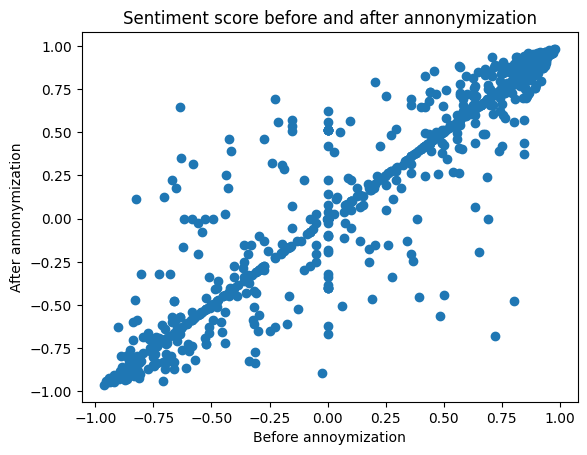

In [88]:
import matplotlib.pyplot as plt

plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


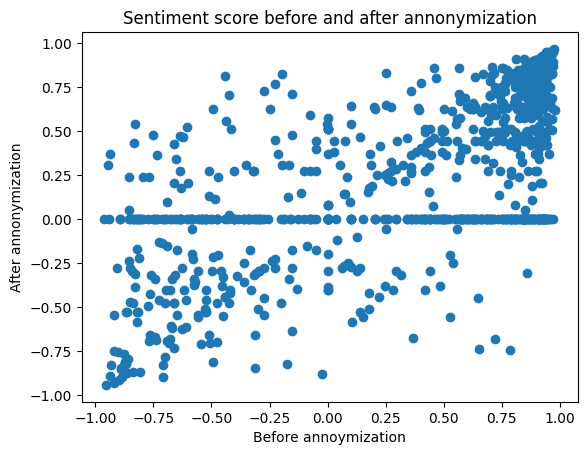

In [89]:
plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['force_anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


In [54]:
utilization_utils.sentiment_test(df_2, 'txt')

709    excellent older edition: this is an older edit...
884    anger management workbook: i use this to help ...
143    it sucked!: i hate the book. it was the worst ...
347    inability to play disc: unfortunately i was no...
255    awful: if you actually like intelligence with ...
                             ...                        
330    very bad blu ray transfer: i like the movie. b...
199    deceptive: deceptive, this is a book with a st...
629    stargate continuum: so glad i purchased the mo...
402    didnt last too long: i only had a few uses out...
131    rash: something in this brand gives my kid a r...
Name: txt, Length: 756, dtype: object


0.8528079710144928

In [55]:
utilization_utils.sentiment_test(df_2, 'anon_txt')

307    have not read ! : this book is not what i expe...
124    cruel . plain cruel .... : i have nothing good...
585    great secret ! : i read this book in one sunda...
480    is there a bad guy collins hd ? : of course no...
325    cruel : this includes is cruel because my this...
                             ...                        
834    love this movie : not your typical high school...
932    well receive : the lanyard and whistle were pu...
61     watch the price : i free this from the same co...
654    good service : i was pleased with the conditio...
277    do not have it : i order it three take and get...
Name: anon_txt, Length: 756, dtype: object


0.7683423913043479

The fully anonymized text gets he highest accuracy score!

In [56]:
utilization_utils.sentiment_test(df_2, 'force_anon_txt')

664    work * . : i free this * for a this * in my at...
182    * problem : i * this * this * and * that it wa...
75     * player : i really * to play the * * , * , th...
205    * - * : the order was never * out . i * the * ...
847    a * book . : * * , * editor . this book is yet...
                             ...                        
281    * * : i have not * * take with this include . ...
504    * * : i love read * * , i am thank i can now r...
731    * : * * . * this * to * from a * / low * * . i...
635    a * - * * . : * * and * ; this is the * good m...
551    easy * : i be very * with this include because...
Name: force_anon_txt, Length: 756, dtype: object


0.7151268115942029

In [57]:
print(nlp_utils.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [58]:
len(nlp_utils.stopwords.words('english'))

179